In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [52]:
def clean_data(df, y):
    df = df[df["3"] == "United States of America"]
    df = df[df["5"] == 0]
    df = df[["9", "10"]]
    df = df.replace('-1', np.NaN)
    df["Year"] = [y for i in range(df.shape[0])]
    return df


In [30]:
def split_data(df):
    df1 = df[df["9"] == 1]
    df2 = df[df["9"] == 0]
    return df1, df2


In [53]:
data_16 = pd.read_csv("data-therapy/data/QA_2016.T.csv")
data_17 = pd.read_csv("data-therapy/data/QA_2017.T.csv")
data_18 = pd.read_csv("data-therapy/data/QA_2018.T.csv")
data_19 = pd.read_csv("data-therapy/data/QA_2019.T.csv")

data_16 = clean_data(data_16, 2016)
data_17 = clean_data(data_17, 2017)
data_18 = clean_data(data_18, 2018)
data_19 = clean_data(data_19, 2019)

print(data_16.shape)
print(data_17.shape)
print(data_18.shape)
print(data_19.shape)


(2116, 3)
(454, 3)
(282, 3)
(184, 3)


In [86]:
year_data = [data_16, data_17, data_18, data_19]

graph_data_tech = []
graph_data_nontech = []

for i in year_data:
    df1, df2 = split_data(i)
    p1 = df1[(df1["10"] == "Yes")].shape[0] / df1.shape[0] * 100.0
    p2 = df2[(df2["10"] == "Yes")].shape[0] / df2.shape[0] * 100.0
    graph_data_tech.append(p1)
    graph_data_nontech.append(p2)

print(graph_data_tech)
print(graph_data_nontech)


[58.76152832674572, 68.4971098265896, 68.29268292682927, 61.111111111111114]
[62.54180602006689, 68.51851851851852, 68.83116883116884, 65.51724137931035]


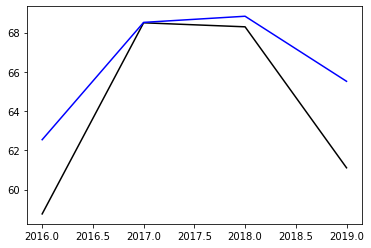

In [87]:
years = [2016, 2017, 2018, 2019]
plt.plot(years, graph_data_tech, "k", years, graph_data_nontech, "b")
plt.show()


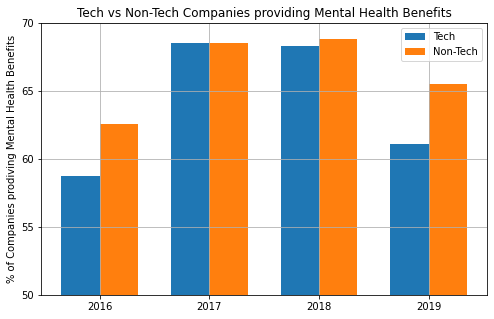

In [100]:
fig, ax = plt.subplots()

ind = np.arange(4) 
width = 0.35 

p1 = ax.bar(ind, graph_data_tech, width, bottom=0)
p2 = ax.bar(ind + width, graph_data_nontech, width, bottom=0)

ax.set_title("Tech vs Non-Tech Companies providing Mental Health Benefits")
ax.set_xticks(width / 2 + ind)
ax.set_xticklabels(("2016", "2017", "2018", "2019"))

ax.legend((p1[0], p2[0]), ("Tech", "Non-Tech"))

plt.grid(True)
plt.ylabel("% of Companies prodiving Mental Health Benefits")
plt.ylim([50, 70])
plt.yticks([50, 55, 60, 65, 70])
plt.gcf().set_size_inches(8, 5)
plt.show()
